# Árvore de decisão

### Base de dados: Forma de Trabalho Ideal

Ilustra o funcionamento do algoritmo de árvore de decisão com dados nominais.

Este notebook foi desenvolvido para o ambiente GOOGLE COLAB ([colab.research.google.com](https://colab.research.google.com)).

Prof. Hugo de Paula

Feito Por: João Vitor de Lima

-------------------------------------------------------------------------------






In [1]:
!pip install pandas scikit-learn matplotlib pydotplus dtreeviz

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import matplotlib.pyplot as plt


### Transformação de dados

Inicialmente os atributos são convertidos para o formato de dicionário.
Em seguida os atributos são transformados em binário, para cada par (key, value) do dicionário.

<code>DictVectorizer(dtype=class ‘numpy.float64’, separator=’=’, sparse=True, sort=True)</code>

A classe é convertida para labels únicos sequenciais.

<code>
 le = preprocessing.LabelEncoder()
  
 le.fit(dados)
</code>


In [ ]:
df = pd.read_csv("data_tratada.csv")  

print("\nDimensões:", df.shape)
print("\nCampos:", df.columns)
print(df.describe())


df = df.dropna(subset=['Forma de trabalho ideal'])

# Preparar as variáveis
X_dict = df.drop(columns=['Forma de trabalho ideal', 'Cargo atual']).T.to_dict().values()
vect = DictVectorizer(sparse=False)
X_train = vect.fit_transform(X_dict)

# Codificar as variáveis 
le = LabelEncoder()
y_train = le.fit_transform(df['Forma de trabalho ideal'])

# Exibir as variáveis e o formato dos dados
print("Atributos:", X_dict)
print("Shape do dado de treinamento:", X_train.shape)
print("Labels:", y_train)



### Indução do Modelo


Os três passos para indução de um modelo são:

1.   Instanciar o modelo: ``` DecisionTreeClassifier()```
2.   Treinar o modelo: ```fit()```
3.   Testar o modelo: ```predict()```



In [3]:
treeForma = DecisionTreeClassifier(random_state=0, criterion='entropy')
treeForma.fit(X_train, y_train)

# Avaliar o modelo por ACURÁCIA
print("Acurácia:", treeForma.score(X_train, y_train))

# Realizar previsões
y_pred = treeForma.predict(X_train)

# Exibir os resultados de acurácia, relatório de classificação e matriz de confusão
print("Acurácia de previsão:", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

cnf_matrix = confusion_matrix(y_train, y_pred)
cnf_table = pd.DataFrame(cnf_matrix, index=[f"Real={c}" for c in le.classes_], columns=[f"Prev={c}" for c in le.classes_])
print(cnf_table)



Acurácia: 0.9972648853355776
Acurácia de previsão: 0.9972648853355776
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       0.99      1.00      1.00      2124
           2       1.00      0.99      1.00       389
           3       1.00      1.00      1.00      2144

    accuracy                           1.00      4753
   macro avg       1.00      1.00      1.00      4753
weighted avg       1.00      1.00      1.00      4753

                                                    Prev=Modelo 100% presencial  \
Real=Modelo 100% presencial                                                  96   
Real=Modelo 100% remoto                                                       0   
Real=Modelo híbrido com dias fixos de trabalho ...                            0   
Real=Modelo híbrido flexível (o funcionário tem...                            0   

                                                    Prev=Modelo 100% remoto  \


### Exibição da árvore de decisão



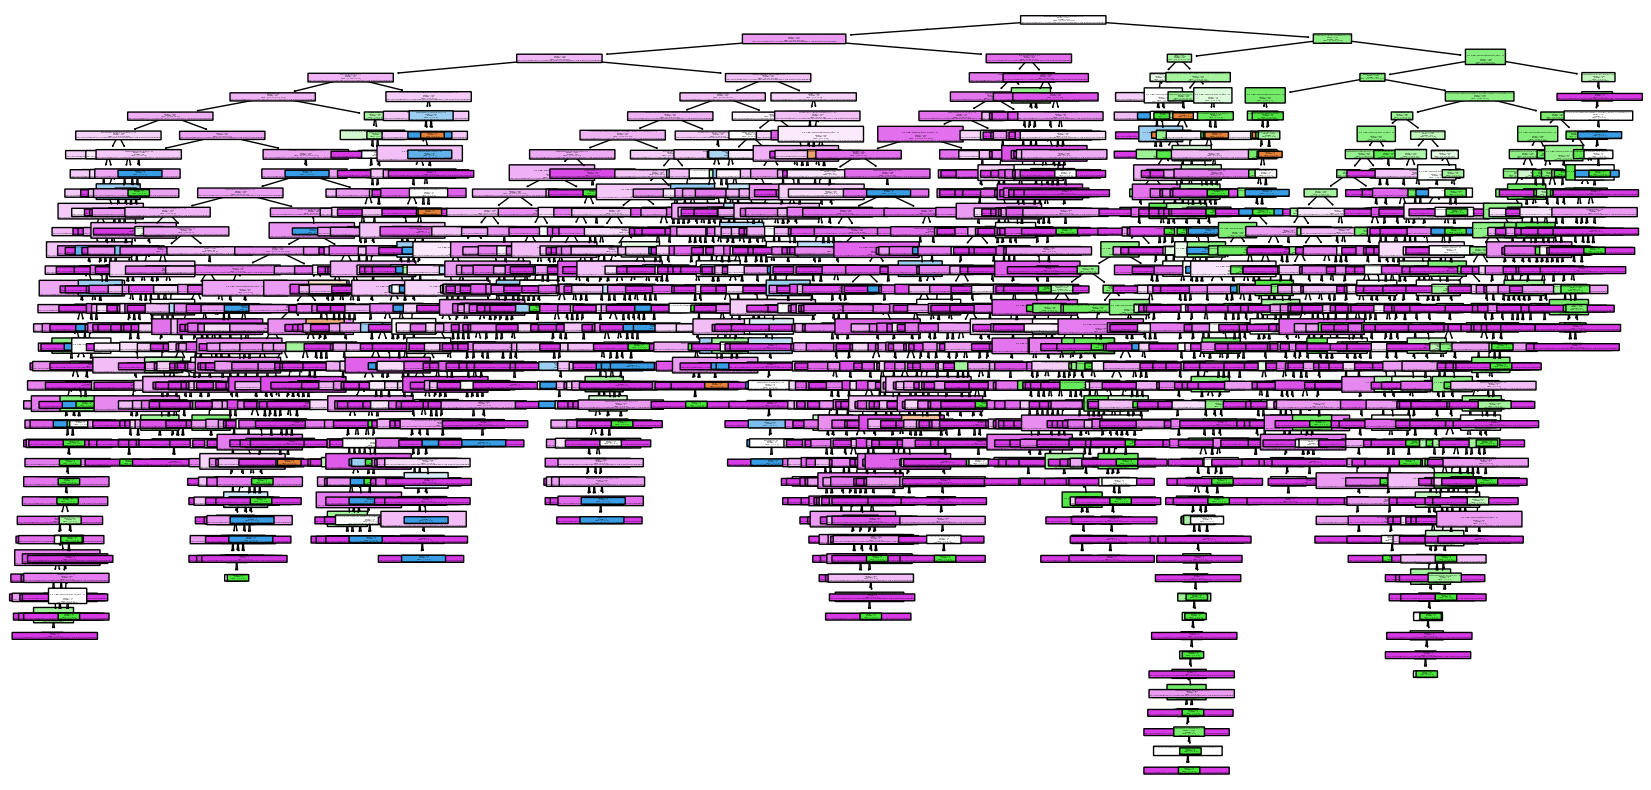

In [4]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(20, 10))
tree.plot_tree(treeForma,
               feature_names=vect.feature_names_,
               class_names=le.classes_,
               filled=True,
               rounded=True)
plt.show()

